In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('data/stock_data/apple_google.csv', parse_dates=['Date'], index_col='Date').dropna()
data.head()

,AAPL,GOOG
Date,,
2010-12-16,45.89,295.56
2010-12-17,45.80,295.10
2010-12-20,46.03,297.23
2010-12-21,46.32,301.23
2010-12-22,46.45,302.44


In [3]:
data.tail()

,AAPL,GOOG
Date,,
2017-05-24,153.34,954.96
2017-05-25,153.87,969.54
2017-05-26,153.61,971.47
2017-05-30,153.67,975.88
2017-05-31,152.76,964.86


In [4]:

# Define a multi-period return function that calculates an expanding cumulative return
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [5]:

# Pass daily returns as the parameters to multi_period_return on a rolling 360-day basis
# This calculates rolling cumulative 360-day returns 
daily_returns = data.pct_change()
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

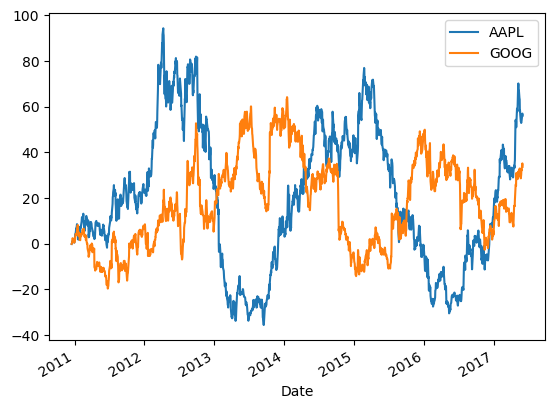

In [6]:

# Plot rolling annual returns %
rolling_annual_returns.mul(100).plot()
plt.show()